# Analysis of computer usage
#### nlantau, 2021-06-21

In [1]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import numpy as np
import os
import glob

# Information
Each minute the computer is on, the time is appended to a text file with the current date as its name.
The structure is like this:
```sh
2021-05-09.log
     |___19:35:01
     |___19:36:01
     |___19:37:01
2021-05-10.log
     |___01:14:01
     |___01:15:01
     |___01:16:01
```

The plan is to start by grabbing all dates and use them as **keys** in a dictionary. The **values** of this dictionary will hold the number of logged minutes.

This dictionary will be parsed to a pandas **DataFrame** and plotted with the help of **Seaborn**.

The reason for using both a dictionary and a DataFrame is to be sure that all the parsing goes as planned.

In [2]:
filepath = os.path.join(os.getcwd(), "log_data")
filepath

'/home/nlantau/.config/scripts/log_data'

In [3]:
filepaths = sorted(glob.glob(filepath + '/2021*.log'))
filepaths[:2]

['/home/nlantau/.config/scripts/log_data/2021-05-09.log',
 '/home/nlantau/.config/scripts/log_data/2021-05-10.log']

In [4]:
date_dict = {}

for f in filepaths:
    # Get filename without full path
    fs = f.strip(filepath)

    with open(f, 'r') as r:
        # Store total amount of minutes for each day
        date_dict[fs] = len([line.strip() for line in r.readlines()])

# Preview date_dict
for i,(k,v) in enumerate(date_dict.items()):
    print(f'{k} : {v}')
    if i==2:break

2021-05-09 : 38
2021-05-10 : 628
2021-05-11 : 675


# Prepare data

In [5]:
# Grab total minutes/day
tot_min_per_day = [date_dict[f.strip(filepath)] for f in filepaths]
tot_min_per_day[-3:]

[189, 317, 552]

## Create new DataFrame with date as column

In [6]:
# Create datetime64 range
date_range = pd.date_range('2021-05-09', periods=len(tot_min_per_day))

# Create the main DataFrame with 'Date' and 'Minutes' as columns
rd = pd.DataFrame({'Date': date_range, 'Minutes': tot_min_per_day})

rd.tail()

,Date,Minutes
94,2021-08-11,116
95,2021-08-12,185
96,2021-08-13,189
97,2021-08-14,317
98,2021-08-15,552


## Display information about DataFrame 'rd'

In [7]:
#rd.info()
rd.describe()

,Minutes
count,99.000000
mean,426.828283
std,198.044421
min,38.000000
25%,292.000000
50%,434.000000
75%,596.500000
max,790.000000


# Plot with Seaborn

In [8]:
sns.set_theme(style="darkgrid")
plt.rcParams['figure.dpi'] = 100

### Plot data and regression model fit

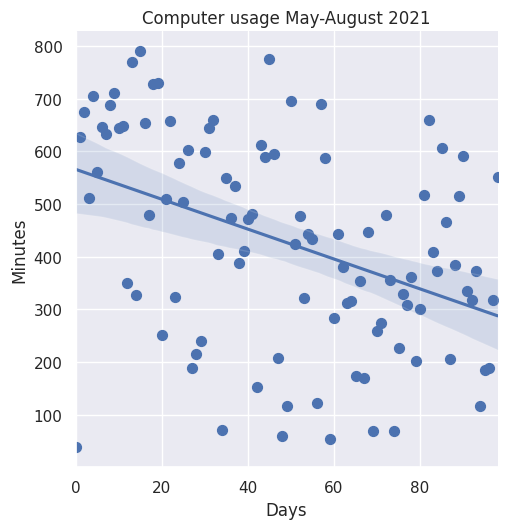

In [9]:
ax = sns.lmplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean, order=1)
ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-August 2021")

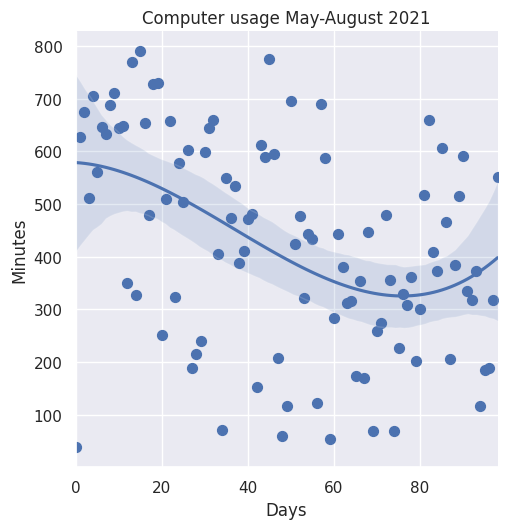

In [10]:
ax = sns.lmplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean, order=3)
ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-August 2021")

In [11]:
#for i in range(1,4):
 #   ax = sns.lmplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean, order=i)
  #  ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-June 2021")

### Plot data and a linear regression model fit

In [12]:
#ax = sns.regplot(x='index', y='Minutes', data=rd.reset_index(), x_estimator=np.mean)
#ax.set(xlabel="Days", ylabel="Minutes", title="Computer usage May-June 2021")

### Histogram of data

<AxesSubplot:ylabel='Count'>

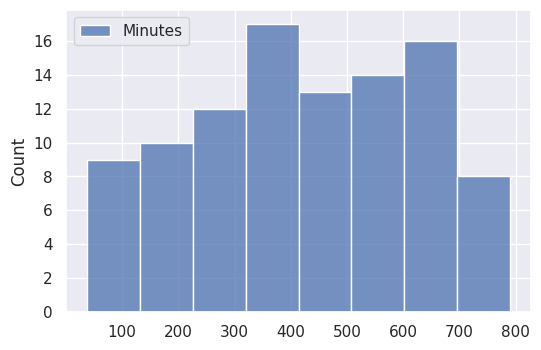

In [13]:
sns.histplot(data=rd)